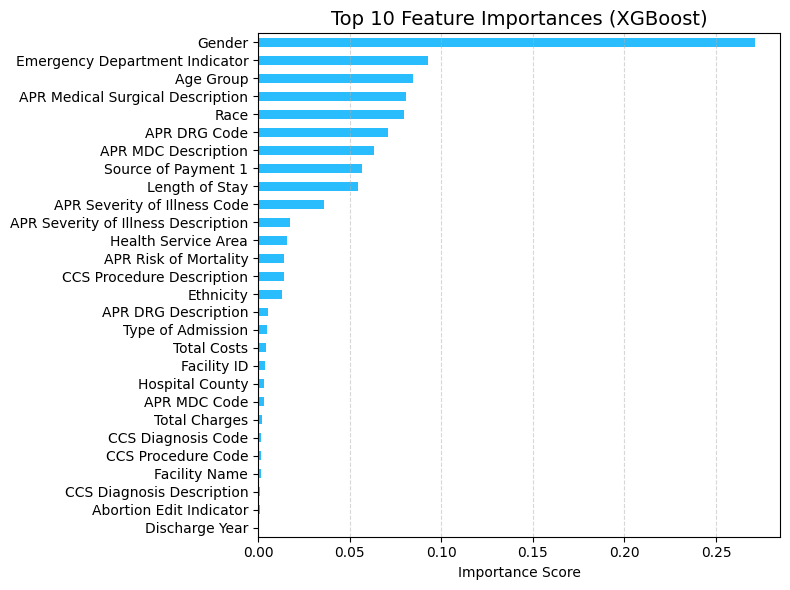

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# 최적 모델 추출
best_model = xgb_rs.best_estimator_

# 중요도 추출
importances = best_model.feature_importances_

# Series로 변환 및 상위 10개 선택
importance_df = pd.Series(importances, index=final_feature_names).sort_values(ascending=False)
# top_10_features = importance_df.head(10)

# 시각화 (가로 그래프)
plt.figure(figsize=(8, 6))
importance_df.plot(kind='barh', color='#29BDFD')
# top_10_features.plot(kind='barh', color='#29BDFD')
plt.title("Top 10 Feature Importances (XGBoost)", fontsize=14)
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # 높은 순으로 위에 오게
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [15]:
# 상위 중요 특성 10개만 보기
importance_df.head(10).to_frame(name='Importance')


,Importance
Gender,0.271329
Emergency Department Indicator,0.092617
Age Group,0.084639
APR Medical Surgical Description,0.080515
Race,0.079725
APR DRG Code,0.071218
APR MDC Description,0.063314
Source of Payment 1,0.056686
Length of Stay,0.054744
APR Severity of Illness Code,0.035826


In [16]:
print(df['Gender'].value_counts(dropna=False))


# 이탈 여부 컬럼 생성 (1 = 이탈, 0 = 정상퇴원)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

Gender
F         1412606
M         1068970
Others         63
Name: count, dtype: int64


In [ ]:
# 각 Gender별 이탈률 계산
Gender = df.groupby('Gender')['y'].mean().sort_values(ascending=False)

print(Gender)

Gender
M         0.034439
Others    0.015873
F         0.013704
Name: y, dtype: float64


In [17]:
top_10_EDI= df['Emergency Department Indicator'].value_counts().head(10)
print(top_10_EDI)

Emergency Department Indicator
Y    1401663
N    1079976
Name: count, dtype: int64


In [ ]:
# df에 'y' 컬럼이 있다고 가정 (이탈 여부: 1 또는 0)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# 각 응급실 여부 코드별 이탈률 계산
drg_evasion = df.groupby('Emergency Department Indicator')['y'].mean().sort_values(ascending=False)
print(drg_evasion.head(10))

Emergency Department Indicator
Y    0.029095
N    0.014253
Name: y, dtype: float64


In [ ]:
## 응급실 여부 : 응급으로 오면 이탈하는 사람이 많다 . 

In [20]:
print(df['Race'].value_counts(dropna=False))


# 이탈 여부 컬럼 생성 (1 = 이탈, 0 = 정상퇴원)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

Race
White                     1521178
Other Race                 467352
Black/African American     466410
Unknown                     26699
Name: count, dtype: int64


In [22]:
# 각 Gender별 이탈률 계산
Race = df.groupby('Race')['y'].mean().sort_values(ascending=False)

print(Race)

Race
Black/African American    0.039427
Other Race                0.026485
White                     0.016458
Unknown                   0.013896
Name: y, dtype: float64


In [ ]:
## 성별: 흑인이 이탈율이 높다 

In [25]:
print(df['APR Medical Surgical Description'].value_counts(dropna=False))


# 이탈 여부 컬럼 생성 (1 = 이탈, 0 = 정상퇴원)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

APR Medical Surgical Description
Medical     1919646
Surgical     561784
Others          209
Name: count, dtype: int64


In [26]:
# 각 APR Medical Surgical Description별 이탈률 계산
Race = df.groupby('APR Medical Surgical Description')['y'].mean().sort_values(ascending=False)

print(Race)

APR Medical Surgical Description
Others      0.028708
Medical     0.028516
Surgical    0.002540
Name: y, dtype: float64


In [ ]:
## 수술여부: 수술을 하는 외과 외의 과가 이탈이 많다 

In [27]:
print(df['Age Group'].value_counts(dropna=False))


# 이탈 여부 컬럼 생성 (1 = 이탈, 0 = 정상퇴원)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

Age Group
70 or Older    678450
50 to 69       633285
30 to 49       522448
0 to 17        375102
18 to 29       272354
Name: count, dtype: int64


In [28]:
# 각 Age Group별 이탈률 계산
Race = df.groupby('Age Group')['y'].mean().sort_values(ascending=False)

print(Race)

Age Group
30 to 49       0.048397
18 to 29       0.035505
50 to 69       0.025971
70 or Older    0.006702
0 to 17        0.000600
Name: y, dtype: float64


In [ ]:
## 나이: 0-17 어리거나 70이상의 사람들은 중증(예측)이므로 이탈을 하지 않는거 같다. 

In [29]:
print(df['Length of Stay'].value_counts(dropna=False))


# 이탈 여부 컬럼 생성 (1 = 이탈, 0 = 정상퇴원)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

Length of Stay
2     582720
3     447886
1     427545
4     280107
5     175890
6     127842
7     102373
8      73844
9      53933
10     42249
11     33729
12     26833
13     23178
14     22387
15     16495
16     12333
17     10243
18      8465
19      7068
20      6519
Name: count, dtype: int64


In [30]:
# 각 Length of Stay별 이탈률 계산
Race = df.groupby('Length of Stay')['y'].mean().sort_values(ascending=False)

print(Race)

Length of Stay
1     0.060635
2     0.020452
3     0.014850
4     0.013445
5     0.012565
6     0.012359
17    0.010739
7     0.009993
8     0.009953
10    0.009633
9     0.009567
19    0.009479
11    0.009398
18    0.009214
20    0.009204
12    0.008907
16    0.008514
15    0.008063
13    0.007421
14    0.007281
Name: y, dtype: float64


In [ ]:
## 입원기간 : 1일 이탈율 많고, 2일~6일 이탈 있고, 갑자기 17일에 이탈율 생김

In [31]:
# df에 'y' 컬럼이 있다고 가정 (이탈 여부: 1 또는 0)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# 각 DRG 코드별 이탈률 계산
drg_evasion = df.groupby('APR DRG Code')['y'].mean().sort_values(ascending=False)
print(drg_evasion.head(10))

APR DRG Code
770    1.000000
894    0.139463
816    0.134312
892    0.117631
662    0.107234
890    0.085417
280    0.063636
282    0.061515
566    0.060130
251    0.059200
Name: y, dtype: float64


In [ ]:
## APR DRG Description = APR DRG Code가 같기때문에 description으로 갈게 

In [32]:
# df에 'y' 컬럼이 있다고 가정 (이탈 여부: 1 또는 0)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# 각 DRG 코드별 이탈률 계산
drg_evasion = df.groupby('APR DRG Description')['y'].mean().sort_values(ascending=False)
print(drg_evasion.head(10))

APR DRG Description
DRUG & ALCOHOL ABUSE OR DEPENDENCE, LEFT AGAINST MEDICAL ADVICE    1.000000
HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATED COND               0.139463
TOXIC EFFECTS OF NON-MEDICINAL SUBSTANCES                          0.134312
HIV W MAJOR HIV RELATED CONDITION                                  0.117631
SICKLE CELL ANEMIA CRISIS                                          0.107234
HIV W MULTIPLE MAJOR HIV RELATED CONDITIONS                        0.085417
ALCOHOLIC LIVER DISEASE                                            0.063636
DISORDERS OF PANCREAS EXCEPT MALIGNANCY                            0.061515
OTHER ANTEPARTUM DIAGNOSES                                         0.060130
ABDOMINAL PAIN                                                     0.059200
Name: y, dtype: float64


In [36]:
# df에 'y' 컬럼이 있다고 가정 (이탈 여부: 1 또는 0)
df['y'] = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# 각 DRG 코드별 이탈률 계산
drg_evasion = df.groupby('APR DRG Code')['y'].mean().sort_values(ascending=False)
print(drg_evasion.head(10))

APR DRG Code
770    1.000000
894    0.139463
816    0.134312
892    0.117631
662    0.107234
890    0.085417
280    0.063636
282    0.061515
566    0.060130
251    0.059200
Name: y, dtype: float64


In [ ]:
# 약물중독, HIV 에이즈, 비의료용 물질의 독성 영향 등 영향이 쭉쭉잇음 

APR DRG Description
DRUG & ALCOHOL ABUSE OR DEPENDENCE, LEFT AGAINST MEDICAL ADVICE    1.000000
HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATED COND               0.139463
TOXIC EFFECTS OF NON-MEDICINAL SUBSTANCES                          0.134312
HIV W MAJOR HIV RELATED CONDITION                                  0.117631
SICKLE CELL ANEMIA CRISIS                                          0.107234
HIV W MULTIPLE MAJOR HIV RELATED CONDITIONS                        0.085417
ALCOHOLIC LIVER DISEASE                                            0.063636
DISORDERS OF PANCREAS EXCEPT MALIGNANCY                            0.061515
OTHER ANTEPARTUM DIAGNOSES                                         0.060130
ABDOMINAL PAIN                                                     0.059200
Name: y, dtype: float64
